<a href="https://colab.research.google.com/github/nsharma73/capstone_haystack/blob/main/Step_1_Data_Processing_Starting_with_GA_Listings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1: Using Haystack Data (GA Listings) Clean Data and Augment with Tax information as well HPI data from IRS and FHFA respectively
**Project**

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import os
from scipy import stats
import math

Use this to manually upload files

In [2]:
#from google.colab import files
#uploaded = files.upload()

In [3]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import sys
sys.path.append('local_modules')
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/Downloads/Haystacks_Data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'19wbPrG4fNpmfRxypxJkzOGSZ2P0k0xre' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)

with open(fname, 'r') as f:
  print(f.read())

title: ga_tax_data.csv, id: 1NTUWjQ-Z7hpGHImePVdeIusW7sIrkTv_
downloading to /root/Downloads/Haystacks_Data/ga_tax_data.csv
title: zip5_hpi.csv, id: 1Xhrp9qlbHjilhDVIW6XVZ16bAeoxOJWq
downloading to /root/Downloads/Haystacks_Data/zip5_hpi.csv
title: GA_LISTINGS_SALES_V2.csv, id: 15Xt6QU-IJgcGnfVjW0uZUGEkhdHlTkFs
downloading to /root/Downloads/Haystacks_Data/GA_LISTINGS_SALES_V2.csv
title: zip_hpi.csv, id: 1F0P-bbpO8ntf72DYuY1LKXX5b1YlFRSp
downloading to /root/Downloads/Haystacks_Data/zip_hpi.csv
title: GA_LISTINGS_SALES_V2.1_excel.xlsm, id: 1BEwtEd3D-_9HNZX9mTfGNHNp2WR7MkW2
downloading to /root/Downloads/Haystacks_Data/GA_LISTINGS_SALES_V2.1_excel.xlsm
title: all_zips_restaurant.json, id: 1_lll8wIPsU2EnP_1hPz5hI5dFQ5VN46y
downloading to /root/Downloads/Haystacks_Data/all_zips_restaurant.json
title: all_zips_grocery_store.json, id: 1UrgOHYGhJxkiI9lOM3dDOj1nxz2TSDuk
downloading to /root/Downloads/Haystacks_Data/all_zips_grocery_store.json
title: middle_schools.csv, id: 1skl5tUyqE5x9i0EWSe

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
df=pd.read_csv('/root/Downloads/Haystacks_Data/GA_LISTINGS_SALES_V2.csv')

In [6]:
df.head()

,Unnamed: 0,latitude,longitude,full_street_address,city,county_name,beds,baths_full,baths_half,square_footage,...,details,special_features,unit_count,price,transaction_type,listing_status,listing_special_features,census_state_name,census_county_name,zip
0,0,30.725605,-83.671772,0 Johnson Road #10026497,Quitman,Brooks-County,NaN,NaN,NaN,NaN,...,"Lots/Land, 4.93 Acres",0,NaN,51900,1,0,0,Georgia,"Brooks, GA",31643
1,1,30.781796,-83.558475,505 S Lee Street,Quitman,Brooks-County,3.0,1.0,NaN,1460.0,...,"Detached, 3 Beds, 1 Bath, 1,460 Sq Ft",0,NaN,99000,1,1,0,Georgia,"Brooks, GA",31643
2,2,30.864096,-81.622765,33 River Oaks Street,Woodbine,Camden-County,3.0,2.0,NaN,1254.0,...,"Detached, 3 Beds, 2 Baths, 1,254 Sq Ft",0,NaN,245816,1,1,0,Georgia,"Camden, GA",31569
3,3,30.796300,-81.681675,605 E Lawnwood Avenue,Kingsland,Camden-County,2.0,2.0,NaN,1016.0,...,"Townhouse, 2 Beds, 2 Baths, 1,016 Sq Ft",0,NaN,155000,1,1,0,Georgia,"Camden, GA",31548
4,4,30.762972,-81.660240,84 Whippoorwill Circle,Kingsland,Camden-County,3.0,2.0,NaN,1618.0,...,"Detached, 3 Beds, 2 Baths, 1,618 Sq Ft",0,NaN,200000,1,1,0,Georgia,"Camden, GA",31548


In [7]:
# Drop first column of dataframe
df = df.iloc[: , 1:]

In [8]:
# strip property type from details feature column
df.details=df.details.str.split(',', expand=True)[[0]]

In [9]:
df.head()

,latitude,longitude,full_street_address,city,county_name,beds,baths_full,baths_half,square_footage,lot_size,...,details,special_features,unit_count,price,transaction_type,listing_status,listing_special_features,census_state_name,census_county_name,zip
0,30.725605,-83.671772,0 Johnson Road #10026497,Quitman,Brooks-County,NaN,NaN,NaN,NaN,4.0,...,Lots/Land,0,NaN,51900,1,0,0,Georgia,"Brooks, GA",31643
1,30.781796,-83.558475,505 S Lee Street,Quitman,Brooks-County,3.0,1.0,NaN,1460.0,0.0,...,Detached,0,NaN,99000,1,1,0,Georgia,"Brooks, GA",31643
2,30.864096,-81.622765,33 River Oaks Street,Woodbine,Camden-County,3.0,2.0,NaN,1254.0,0.0,...,Detached,0,NaN,245816,1,1,0,Georgia,"Camden, GA",31569
3,30.796300,-81.681675,605 E Lawnwood Avenue,Kingsland,Camden-County,2.0,2.0,NaN,1016.0,0.0,...,Townhouse,0,NaN,155000,1,1,0,Georgia,"Camden, GA",31548
4,30.762972,-81.660240,84 Whippoorwill Circle,Kingsland,Camden-County,3.0,2.0,NaN,1618.0,0.0,...,Detached,0,NaN,200000,1,1,0,Georgia,"Camden, GA",31548


In [10]:
# include only detached properties
df=df.loc[df['details']=='Detached']

In [11]:
# drop properties with zero square footage
df=df.loc[df['square_footage']!=0]

In [12]:
# reset index 
df=df.reset_index(drop=True)

In [13]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature latitude :10377
The number of values for feature longitude :10315
The number of values for feature full_street_address :11038
The number of values for feature city :449
The number of values for feature county_name :148
The number of values for feature beds :18
The number of values for feature baths_full :16
The number of values for feature baths_half :11
The number of values for feature square_footage :3436
The number of values for feature lot_size :132
The number of values for feature year_built :165
The number of values for feature details :1 -- ['Detached']
The number of values for feature special_features :8 -- [  0   1   2   3  20  64 512 514]
The number of values for feature unit_count :14
The number of values for feature price :2441
The number of values for feature transaction_type :1 -- [1]
The number of values for feature listing_status :2 -- [0 1]
The number of values for feature listing_special_features :8 -- [  0   1   2   3  20  64 512 514]

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,12206.0,33.590218,0.834537,30.361079,33.351920,33.779436,34.085610,3.499197e+01
longitude,12206.0,-83.866255,0.987522,-85.502994,-84.451997,-84.135132,-83.656075,-8.084255e+01
beds,12058.0,3.756096,1.305836,0.000000,3.000000,4.000000,4.000000,7.100000e+01
baths_full,11894.0,2.581806,1.277515,1.000000,2.000000,2.000000,3.000000,5.600000e+01
baths_half,4867.0,1.111362,0.538231,0.000000,1.000000,1.000000,1.000000,1.000000e+01
square_footage,10474.0,2556.527401,1817.236042,1.000000,1512.000000,2153.000000,3006.000000,4.128000e+04
lot_size,11106.0,28.831352,1032.194826,0.000000,0.000000,0.000000,1.000000,7.361600e+04
year_built,12168.0,1987.859632,30.831242,1701.000000,1969.000000,1995.000000,2014.000000,2.023000e+03
special_features,12206.0,5.437408,50.303405,0.000000,0.000000,0.000000,0.000000,5.140000e+02
unit_count,149.0,3.684564,7.586517,1.000000,2.000000,2.000000,4.000000,8.900000e+01


In [15]:
df.isna().sum()

latitude                        0
longitude                       0
full_street_address             0
city                            0
county_name                     0
beds                          148
baths_full                    312
baths_half                   7339
square_footage               1732
lot_size                     1100
year_built                     38
details                         0
special_features                0
unit_count                  12057
price                           0
transaction_type                0
listing_status                  0
listing_special_features        0
census_state_name               0
census_county_name              0
zip                             0
dtype: int64

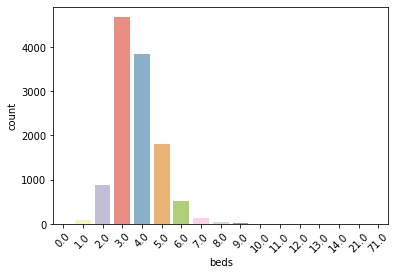

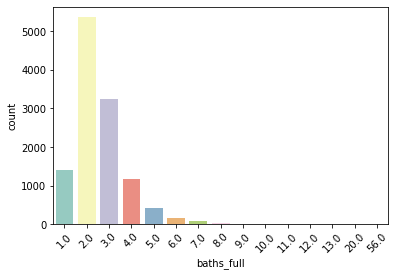

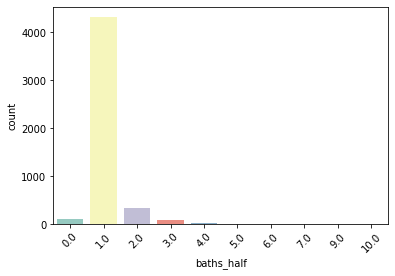

In [16]:
features = [
       'beds', 'baths_full',
       'baths_half']

for f in features:
    sns.countplot(x = f, data = df, palette = 'Set3')
    plt.xticks(rotation=45)
    plt.show()

In [17]:
df.city.value_counts().head(10)

Atlanta          1153
Savannah          458
MacOn             307
Marietta          285
Lawrenceville     225
Gainesville       211
Dallas            203
Decatur           195
Cumming           184
Loganville        166
Name: city, dtype: int64

In [18]:
df.year_built.value_counts().head(10)

2022.0    1621
2021.0     637
2006.0     303
2005.0     278
2004.0     242
1999.0     231
2000.0     226
2007.0     216
2001.0     213
1950.0     208
Name: year_built, dtype: int64

In [19]:
# identify categorical data (ensure it is set to object type):
    #city
    #county_name
    #details (extract house type)
    #special features (probably categorical, convert to object type)
    #census_state_name 
    #census_county_name
    #zip 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12206 entries, 0 to 12205
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   latitude                  12206 non-null  float64
 1   longitude                 12206 non-null  float64
 2   full_street_address       12206 non-null  object 
 3   city                      12206 non-null  object 
 4   county_name               12206 non-null  object 
 5   beds                      12058 non-null  float64
 6   baths_full                11894 non-null  float64
 7   baths_half                4867 non-null   float64
 8   square_footage            10474 non-null  float64
 9   lot_size                  11106 non-null  float64
 10  year_built                12168 non-null  float64
 11  details                   12206 non-null  object 
 12  special_features          12206 non-null  int64  
 13  unit_count                149 non-null    float64
 14  price 

In [20]:
df['special_features'] = df['special_features'].astype(object)

#transaction_type ( this needs to be converted to object))
df['transaction_type'] = df['transaction_type'].astype(object)

#listing_status (convert to object)
df['listing_status'] = df['listing_status'].astype(object)
        
#listing_special_features (covert to object)
df['listing_special_features'] = df['listing_special_features'].astype(object)

In [21]:
df.shape

(12206, 21)

In [22]:
df.unit_count.value_counts()

2.0     66
1.0     25
4.0     17
3.0     15
5.0     12
6.0      4
7.0      3
14.0     2
89.0     1
12.0     1
24.0     1
10.0     1
11.0     1
Name: unit_count, dtype: int64

In [23]:
df.unit_count.isna().sum()

12057

In [24]:
df.baths_half.value_counts()

1.0     4319
2.0      331
0.0       99
3.0       83
4.0       19
5.0        9
10.0       3
6.0        2
9.0        1
7.0        1
Name: baths_half, dtype: int64

In [25]:
df.baths_half.isna().sum()
# assuming that baths_half = 0 when missing?

7339

In [26]:
df['baths_half'] = df['baths_half'].fillna(0)

In [27]:
# drop unit count columns with a majority null values
df=df.drop(['unit_count'], axis=1)

In [28]:
df.isna().sum()

latitude                       0
longitude                      0
full_street_address            0
city                           0
county_name                    0
beds                         148
baths_full                   312
baths_half                     0
square_footage              1732
lot_size                    1100
year_built                    38
details                        0
special_features               0
price                          0
transaction_type               0
listing_status                 0
listing_special_features       0
census_state_name              0
census_county_name             0
zip                            0
dtype: int64

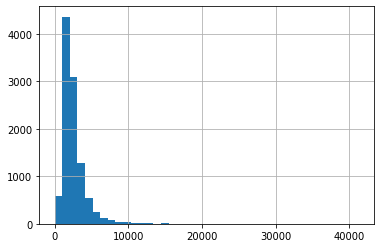

In [29]:
df.square_footage.hist(bins=40)

In [30]:
df[df['square_footage'] < 500].shape

(43, 20)

In [31]:
df.special_features.value_counts()

0      9290
2      2373
1       373
512     104
3        48
514      15
64        2
20        1
Name: special_features, dtype: int64

In [32]:
df[['price','special_features']].groupby('special_features').mean()/1000

,price
special_features,
0,567.339472
1,596.779676
2,683.991290
3,564.940500
20,40.000000
64,47.500000
512,1305.432913
514,1085.419067


In [33]:
##drop lot size
df=df.drop(['lot_size'], axis=1)

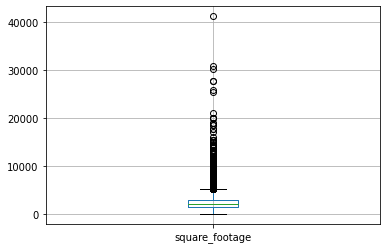

In [34]:
boxplot = df[['square_footage']].boxplot()

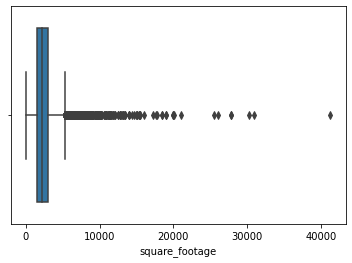

In [35]:
sns.boxplot(data=df, x="square_footage", hue="special_features")

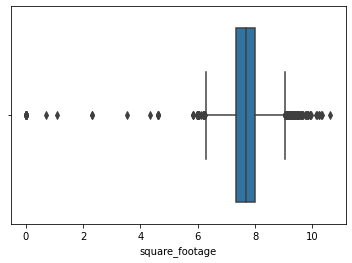

In [36]:
sns.boxplot(x=np.log(df["square_footage"]))

In [37]:
# should we use log of square footage?

In [38]:
#df[df.square_footage < 500].square_footage = np.nan
df.loc[df['square_footage'] < 500, 'square_footage'] = np.nan

In [39]:
df[df.square_footage < 500].square_footage

Series([], Name: square_footage, dtype: float64)

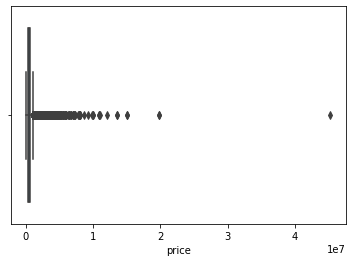

In [40]:
sns.boxplot(x=df["price"])

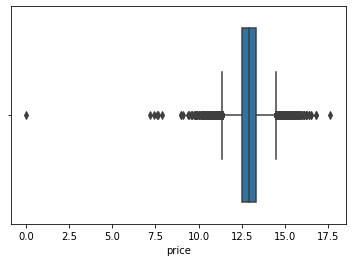

In [41]:
sns.boxplot(x=np.log(df["price"]))

In [42]:
df.price.describe()

count    1.220600e+04
mean     5.977054e+05
std      8.924604e+05
min      1.000000e+00
25%      2.800000e+05
50%      4.000000e+05
75%      6.074392e+05
max      4.525000e+07
Name: price, dtype: float64

In [43]:
df.price.isna().sum()

0

In [44]:
df[df['price']>=300000].shape

(8624, 19)

In [45]:
df=df.loc[df['price']>=300000]

In [46]:
df[df['price']<=650000].shape
df=df.loc[df['price']<=650000]

In [47]:
df.shape

(5911, 19)

Impute Missing Values

In [48]:
!pip install missingpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 1.5 MB/s 


In [49]:
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base


In [50]:
# Let X be an array containing missing values
#from missingpy import KNNImputer
#imputer = KNNImputer()
#imputer = KNNImputer(n_neighbors=5, weights="distance")
#X = np.array(df.beds).reshape(-1, 1)
#X_imputed = imputer.fit_transform(X)

In [51]:
df[df.beds.isna()]

,latitude,longitude,full_street_address,city,county_name,beds,baths_full,baths_half,square_footage,year_built,details,special_features,price,transaction_type,listing_status,listing_special_features,census_state_name,census_county_name,zip
111,31.775980,-82.349588,[Address Not Provided],Baxley,Appling-County,NaN,NaN,0.0,NaN,2015.0,Detached,2,440000,1,1,2,Georgia,"Appling, GA",31513
881,32.403632,-81.774937,230 Lanier Drive #281-284 PARK PLACE,Statesboro,Bulloch-County,NaN,NaN,0.0,NaN,1992.0,Detached,0,368000,1,1,0,Georgia,"Bulloch, GA",30458
882,32.403632,-81.774937,230 Lanier Drive #277-280,Statesboro,Bulloch-County,NaN,NaN,0.0,NaN,1992.0,Detached,0,368000,1,1,0,Georgia,"Bulloch, GA",30458
928,32.453012,-81.778317,1 N Mulberry Street,Statesboro,Bulloch-County,NaN,NaN,0.0,NaN,1961.0,Detached,0,375000,1,1,0,Georgia,"Bulloch, GA",30458
1174,33.625220,-85.131033,217 & 229 Little River Road,Carrollton,Carroll-County,NaN,NaN,0.0,NaN,1984.0,Detached,0,495000,1,1,0,Georgia,"Carroll, GA",30117
1334,32.024322,-81.078807,2201 Walz Drive,Savannah,Chatham-County,NaN,NaN,0.0,NaN,1956.0,Detached,0,610000,1,0,0,Georgia,"Chatham, GA",31404
2134,33.591875,-84.458281,2048/2050 Banks Way,Atlanta,Clayton-County,NaN,NaN,0.0,NaN,1989.0,Detached,0,425000,1,1,0,Georgia,"Clayton, GA",30349
2235,34.072441,-84.526363,4919 Farmstead Court NE #4921 AND 4919,Woodstock,Cobb-County,NaN,NaN,0.0,NaN,1983.0,Detached,0,390000,1,1,0,Georgia,"Cobb, GA",30188
2336,33.815929,-84.626877,2503 Brooks Drive,Austell,Cobb-County,NaN,NaN,0.0,NaN,1958.0,Detached,0,330000,1,1,0,Georgia,"Cobb, GA",30106
2751,33.986234,-84.482972,2361 Hembree Drive,Marietta,Cobb-County,NaN,NaN,0.0,NaN,2022.0,Detached,2,610000,1,1,2,Georgia,"Cobb, GA",30062


In [52]:
df2 = df[['beds','baths_full','square_footage','year_built','price']]

# Using Random Forest to impute missing data

In [53]:
from missingpy import MissForest
imputer = MissForest() #miss forest
X_imputed = imputer.fit_transform(df2)
X_imputed = pd.DataFrame(X_imputed, columns = df2.columns).round(1)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 0


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 1


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 2


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 4


In [54]:
X_imputed.shape

(5911, 5)

In [55]:
X_imputed.isna().sum()

beds              0
baths_full        0
square_footage    0
year_built        0
price             0
dtype: int64

In [56]:
df['beds_imputed'] = df['beds'].fillna(X_imputed['beds'])
df['baths_full_imputed'] = df['baths_full'].fillna(X_imputed['baths_full'])
df['year_built_imputed'] = df['year_built'].fillna(X_imputed['year_built'])
df['square_footage_imputed'] = df['square_footage'].fillna(X_imputed['square_footage'])

In [57]:
df.isna().sum()

latitude                      0
longitude                     0
full_street_address           0
city                          0
county_name                   0
beds                         43
baths_full                  102
baths_half                    0
square_footage              771
year_built                   15
details                       0
special_features              0
price                         0
transaction_type              0
listing_status                0
listing_special_features      0
census_state_name             0
census_county_name            0
zip                           0
beds_imputed                 20
baths_full_imputed           59
year_built_imputed           13
square_footage_imputed      474
dtype: int64

In [58]:
df[df['beds'] != df['beds_imputed']].shape

(43, 23)

In [59]:
df[df['baths_full'] != df['baths_full_imputed']].shape

(102, 23)

In [60]:
df[df['year_built'] != df['year_built_imputed']].shape

(15, 23)

In [61]:
df.drop(['beds','baths_full','year_built', 'square_footage'],inplace=True,axis=1)

In [62]:
df.rename(columns={"beds_imputed": "beds", "baths_full_imputed": "baths_full",
                   "year_built_imputed": "year_built", 
                   "square_footage_imputed":"square_footage"}, inplace=True)

In [63]:
df.head()

,latitude,longitude,full_street_address,city,county_name,baths_half,details,special_features,price,transaction_type,listing_status,listing_special_features,census_state_name,census_county_name,zip,beds,baths_full,year_built,square_footage
3,30.804209,-81.653325,101 College Street,Kingsland,Camden-County,0.0,Detached,2,339900,1,1,2,Georgia,"Camden, GA",31548,4.0,2.0,2020.0,2103.0
6,30.767365,-81.588272,169 School House Creek Drive,Saint Marys,Camden-County,0.0,Detached,0,310000,1,1,0,Georgia,"Camden, GA",31558,5.0,3.0,2004.0,2269.0
7,30.746731,-81.633995,1621 Sandpiper Court,Saint Marys,Camden-County,0.0,Detached,0,315000,1,1,0,Georgia,"Camden, GA",31558,3.0,2.0,2004.0,1846.0
13,30.791878,-81.676750,346 Laurel Landing Boulevard,Kingsland,Camden-County,0.0,Detached,0,310000,1,1,0,Georgia,"Camden, GA",31548,3.0,2.0,2017.0,1977.0
14,31.104492,-81.604486,81 Ossabaw Way,Waverly,Camden-County,0.0,Detached,2,369900,1,1,2,Georgia,"Camden, GA",31565,3.0,2.0,2022.0,1835.0


In [64]:
#df.to_csv('out.csv', index=False)

In [65]:
df.isna().sum()

latitude                      0
longitude                     0
full_street_address           0
city                          0
county_name                   0
baths_half                    0
details                       0
special_features              0
price                         0
transaction_type              0
listing_status                0
listing_special_features      0
census_state_name             0
census_county_name            0
zip                           0
beds                         20
baths_full                   59
year_built                   13
square_footage              474
dtype: int64

In [66]:
# save a list of categorical cols
cats=[]
for col in df.columns:
  if df[col].dtype=='object':
    cats.append(col)

In [67]:
# save a list of numerical cols
numers=[]
for col in df.columns:
  if df[col].dtype==('float64') or df[col].dtype==('int64'):
    numers.append(col)

In [68]:
cats

['full_street_address',
 'city',
 'county_name',
 'details',
 'special_features',
 'transaction_type',
 'listing_status',
 'listing_special_features',
 'census_state_name',
 'census_county_name',
 'zip']

In [69]:
numers

['latitude',
 'longitude',
 'baths_half',
 'price',
 'beds',
 'baths_full',
 'year_built',
 'square_footage']

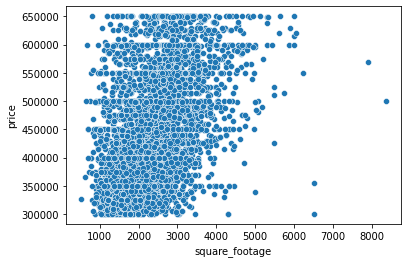

In [70]:
sns.scatterplot(data=df, x='square_footage', y='price')

In [71]:
df[df['square_footage']>30000]

,latitude,longitude,full_street_address,city,county_name,baths_half,details,special_features,price,transaction_type,listing_status,listing_special_features,census_state_name,census_county_name,zip,beds,baths_full,year_built,square_footage


# Merging the HPI Data

In [72]:
hpi = pd.read_csv('/root/Downloads/Haystacks_Data/zip5_hpi.csv')

In [73]:
hpi.head()

,ZipCode,Y2020,Y2021
0,1001,297.85,331.21
1,1002,424.18,455.47
2,1005,206.43,247.43
3,1007,318.44,349.00
4,1008,143.35,158.84


In [74]:
#hpi.pct_change(axis='columns', periods=-1)
hpi['PCT_CHG'] = (hpi['Y2021'] / hpi['Y2020'] - 1).fillna(0)

In [75]:
hpi.replace([np.inf, -np.inf], 0, inplace=True)

In [76]:
hpi['PCT_CHG'].min()

-1.0

In [77]:
val = hpi[hpi['PCT_CHG'] > 0].PCT_CHG.mean(axis=0, skipna=True)

In [78]:
hpi.loc[hpi['PCT_CHG'] <= 0, 'PCT_CHG'] = val

In [79]:
hpi.PCT_CHG.max()

0.6390828278203806

In [80]:
hpi.head()

,ZipCode,Y2020,Y2021,PCT_CHG
0,1001,297.85,331.21,0.112003
1,1002,424.18,455.47,0.073766
2,1005,206.43,247.43,0.198615
3,1007,318.44,349.00,0.095968
4,1008,143.35,158.84,0.108057


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5911 entries, 3 to 12205
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   latitude                  5911 non-null   float64
 1   longitude                 5911 non-null   float64
 2   full_street_address       5911 non-null   object 
 3   city                      5911 non-null   object 
 4   county_name               5911 non-null   object 
 5   baths_half                5911 non-null   float64
 6   details                   5911 non-null   object 
 7   special_features          5911 non-null   object 
 8   price                     5911 non-null   int64  
 9   transaction_type          5911 non-null   object 
 10  listing_status            5911 non-null   object 
 11  listing_special_features  5911 non-null   object 
 12  census_state_name         5911 non-null   object 
 13  census_county_name        5911 non-null   object 
 14  zip    

In [82]:
df['zip'] = df['zip'].astype(str).astype(int)

In [83]:
#df2.drop(['ZipCode', 'Y2020','Y2021','PCT_CHG'], axis=1, inplace=True)

In [84]:
df2.head()

,beds,baths_full,square_footage,year_built,price
3,4.0,2.0,2103.0,2020.0,339900
6,5.0,3.0,2269.0,2004.0,310000
7,3.0,2.0,1846.0,2004.0,315000
13,3.0,2.0,1977.0,2017.0,310000
14,3.0,2.0,1835.0,2022.0,369900


In [85]:
df2 = pd.merge(df,hpi, how = "left", left_on="zip", right_on="ZipCode")

In [86]:
df2.head()

,latitude,longitude,full_street_address,city,county_name,baths_half,details,special_features,price,transaction_type,...,census_county_name,zip,beds,baths_full,year_built,square_footage,ZipCode,Y2020,Y2021,PCT_CHG
0,30.804209,-81.653325,101 College Street,Kingsland,Camden-County,0.0,Detached,2,339900,1,...,"Camden, GA",31548,4.0,2.0,2020.0,2103.0,31548.0,202.90,226.83,0.117940
1,30.767365,-81.588272,169 School House Creek Drive,Saint Marys,Camden-County,0.0,Detached,0,310000,1,...,"Camden, GA",31558,5.0,3.0,2004.0,2269.0,31558.0,237.93,265.03,0.113899
2,30.746731,-81.633995,1621 Sandpiper Court,Saint Marys,Camden-County,0.0,Detached,0,315000,1,...,"Camden, GA",31558,3.0,2.0,2004.0,1846.0,31558.0,237.93,265.03,0.113899
3,30.791878,-81.676750,346 Laurel Landing Boulevard,Kingsland,Camden-County,0.0,Detached,0,310000,1,...,"Camden, GA",31548,3.0,2.0,2017.0,1977.0,31548.0,202.90,226.83,0.117940
4,31.104492,-81.604486,81 Ossabaw Way,Waverly,Camden-County,0.0,Detached,2,369900,1,...,"Camden, GA",31565,3.0,2.0,2022.0,1835.0,31565.0,129.63,132.31,0.020674


found a bug with float not taking replace nan

In [87]:
df2.PCT_CHG.isna().sum()

64

In [88]:
val = df2[['PCT_CHG']].mean(axis=0, skipna=True)
print(val)

PCT_CHG    0.142744
dtype: float64


In [89]:
df2['PCT_CHG'].fillna(value=val, inplace=True)

In [90]:
df2.PCT_CHG.isna().sum()

64

In [91]:
df2.loc[df2['PCT_CHG'].isna(), 'PCT_CHG'] = 0

In [92]:
df2.loc[df2['PCT_CHG'] == 0, 'PCT_CHG'] = 0.138411

In [93]:
df2.head()

,latitude,longitude,full_street_address,city,county_name,baths_half,details,special_features,price,transaction_type,...,census_county_name,zip,beds,baths_full,year_built,square_footage,ZipCode,Y2020,Y2021,PCT_CHG
0,30.804209,-81.653325,101 College Street,Kingsland,Camden-County,0.0,Detached,2,339900,1,...,"Camden, GA",31548,4.0,2.0,2020.0,2103.0,31548.0,202.90,226.83,0.117940
1,30.767365,-81.588272,169 School House Creek Drive,Saint Marys,Camden-County,0.0,Detached,0,310000,1,...,"Camden, GA",31558,5.0,3.0,2004.0,2269.0,31558.0,237.93,265.03,0.113899
2,30.746731,-81.633995,1621 Sandpiper Court,Saint Marys,Camden-County,0.0,Detached,0,315000,1,...,"Camden, GA",31558,3.0,2.0,2004.0,1846.0,31558.0,237.93,265.03,0.113899
3,30.791878,-81.676750,346 Laurel Landing Boulevard,Kingsland,Camden-County,0.0,Detached,0,310000,1,...,"Camden, GA",31548,3.0,2.0,2017.0,1977.0,31548.0,202.90,226.83,0.117940
4,31.104492,-81.604486,81 Ossabaw Way,Waverly,Camden-County,0.0,Detached,2,369900,1,...,"Camden, GA",31565,3.0,2.0,2022.0,1835.0,31565.0,129.63,132.31,0.020674


In [94]:
df2.drop(['ZipCode', 'Y2020','Y2021'], axis=1, inplace=True)

In [95]:
tax = pd.read_csv('/root/Downloads/Haystacks_Data/ga_tax_data.csv')

In [96]:
tax.shape

(5334, 23)

In [97]:
tax.head(10)

,ZIP,gross_range,Individuals_taxed,Elderly_taxed,Total_AGI,Number_of_returns,Total_income,Income_per_return,Int_Number of returns,Int_Amount,...,UE_claims,Social_security,SB_income,Student_loan_ded,RE_taxes,PP_taxes,Mortgage_Int_paid,Taxable_inc,Child_credit,Earned_Inc_credit
0,0.0,"$1 under $25,000",2541970.0,263720.0,22022473.0,1721510.0,22466321.0,13.050358,159830.0,118926.0,...,2.650756,2.175708,1.711000,0.925326,3.046695,0.515131,8.187611,5.108415,0.342169,2.894770
1,0.0,"$25,000 under $50,000",2185530.0,199930.0,41270125.0,1144020.0,41745495.0,36.490179,156280.0,145730.0,...,2.394631,7.129061,7.932646,1.063708,2.735561,0.795341,7.237558,19.037843,1.197139,2.351768
2,0.0,"$50,000 under $75,000",1265460.0,153930.0,38156316.0,621540.0,38568414.0,62.052988,155560.0,166725.0,...,2.642868,15.733585,13.876696,1.252795,2.895932,0.640170,7.632109,41.811811,2.273538,0.483000
3,0.0,"$75,000 under $100,000",872360.0,112580.0,32849922.0,379220.0,33138688.0,87.386446,133680.0,171524.0,...,2.791194,20.959103,18.668958,1.121955,3.250570,0.575786,8.407577,63.933145,2.689675,NaN
4,0.0,"$100,000 under $200,000",1515900.0,178900.0,79560233.0,580760.0,80297769.0,138.263257,288490.0,491388.0,...,3.221080,25.522051,32.003616,1.218707,4.147170,0.549020,10.550146,110.207559,2.797180,NaN
5,0.0,"$200,000 or more",680510.0,68090.0,111878646.0,234090.0,113142494.0,483.329036,178130.0,1508755.0,...,3.580000,29.935369,229.043267,NaN,8.153561,0.592897,16.051146,416.463547,2.902940,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,30002.0,NaN,5630.0,830.0,311795.0,3220.0,316275.0,98.222050,1160.0,2133.0,...,3.380000,18.939130,72.596429,1.075758,6.155714,0.393750,11.932258,90.082482,2.174667,2.242222
8,30002.0,"$1 under $25,000",1100.0,170.0,11212.0,860.0,11572.0,13.455814,120.0,107.0,...,3.166667,2.925000,3.375000,0.766667,NaN,NaN,NaN,5.430769,0.366667,2.294118
9,30002.0,"$25,000 under $50,000",940.0,130.0,24007.0,660.0,24316.0,36.842424,110.0,76.0,...,NaN,9.185714,NaN,1.188889,3.166667,0.333333,7.060000,21.078462,1.071429,2.081818


In [98]:
tax = tax[tax['ZIP'] > 0]


In [99]:
tax = tax[tax['gross_range'].isna()]

In [100]:
tax.isna().sum()

ZIP                        0
gross_range              666
Individuals_taxed          0
Elderly_taxed              0
Total_AGI                  0
Number_of_returns          0
Total_income               0
Income_per_return          0
Int_Number of returns      0
Int_Amount                 0
Int_earned                 4
Cap_gain                  32
Pension                    3
UE_claims                167
Social_security            3
SB_income                113
Student_loan_ded          71
RE_taxes                  72
PP_taxes                 124
Mortgage_Int_paid         90
Taxable_inc                0
Child_credit               1
Earned_Inc_credit          1
dtype: int64

In [101]:
tax.drop(columns=['gross_range'], inplace = True)

In [102]:
tax = tax.fillna(0)

In [103]:
df2.shape

(5911, 20)

In [104]:
df3 = pd.merge(df2,tax, how = "left", left_on="zip", right_on="ZIP")

In [105]:
df3.shape

(5911, 42)

In [106]:
df3.head()

,latitude,longitude,full_street_address,city,county_name,baths_half,details,special_features,price,transaction_type,...,UE_claims,Social_security,SB_income,Student_loan_ded,RE_taxes,PP_taxes,Mortgage_Int_paid,Taxable_inc,Child_credit,Earned_Inc_credit
0,30.804209,-81.653325,101 College Street,Kingsland,Camden-County,0.0,Detached,2,339900,1,...,3.546154,12.728319,36.895652,1.067021,3.122857,0.676744,8.708955,43.969231,2.125743,2.585463
1,30.767365,-81.588272,169 School House Creek Drive,Saint Marys,Camden-County,0.0,Detached,0,310000,1,...,3.477778,17.108497,46.670968,1.004819,4.105556,0.758537,10.493939,50.748133,2.175097,2.555497
2,30.746731,-81.633995,1621 Sandpiper Court,Saint Marys,Camden-County,0.0,Detached,0,315000,1,...,3.477778,17.108497,46.670968,1.004819,4.105556,0.758537,10.493939,50.748133,2.175097,2.555497
3,30.791878,-81.676750,346 Laurel Landing Boulevard,Kingsland,Camden-County,0.0,Detached,0,310000,1,...,3.546154,12.728319,36.895652,1.067021,3.122857,0.676744,8.708955,43.969231,2.125743,2.585463
4,31.104492,-81.604486,81 Ossabaw Way,Waverly,Camden-County,0.0,Detached,2,369900,1,...,0.000000,17.610526,65.228571,1.160000,4.311111,0.400000,10.333333,58.208108,1.936000,2.294118


In [107]:
df3.isna().sum()

latitude                      0
longitude                     0
full_street_address           0
city                          0
county_name                   0
baths_half                    0
details                       0
special_features              0
price                         0
transaction_type              0
listing_status                0
listing_special_features      0
census_state_name             0
census_county_name            0
zip                           0
beds                         20
baths_full                   59
year_built                   13
square_footage              474
PCT_CHG                       0
ZIP                           5
Individuals_taxed             5
Elderly_taxed                 5
Total_AGI                     5
Number_of_returns             5
Total_income                  5
Income_per_return             5
Int_Number of returns         5
Int_Amount                    5
Int_earned                    5
Cap_gain                      5
Pension 

In [108]:
pd.set_option('display.max_columns', None)
df3[df3.ZIP.isna()].census_county_name.unique()

array(['Baldwin, GA', 'Clayton, GA', 'DeKalb, GA', 'Evans, GA',
       'Gordon, GA'], dtype=object)

In [109]:
df4 = df3[df3.census_county_name.isin(['Baldwin, GA', 'Clayton, GA', 'DeKalb, GA', 'Evans, GA',
                            'Fulton, GA', 'Gordon, GA', 'Morgan, GA', 'Rabun, GA', 'Wilcox, GA'])]

In [110]:
df4.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [111]:
df4.shape

(1070, 42)

In [112]:
df4.columns

Index(['latitude', 'longitude', 'full_street_address', 'city', 'county_name',
       'baths_half', 'details', 'special_features', 'price',
       'transaction_type', 'listing_status', 'listing_special_features',
       'census_state_name', 'census_county_name', 'zip', 'beds', 'baths_full',
       'year_built', 'square_footage', 'PCT_CHG', 'ZIP', 'Individuals_taxed',
       'Elderly_taxed', 'Total_AGI', 'Number_of_returns', 'Total_income',
       'Income_per_return', 'Int_Number of returns', 'Int_Amount',
       'Int_earned', 'Cap_gain', 'Pension', 'UE_claims', 'Social_security',
       'SB_income', 'Student_loan_ded', 'RE_taxes', 'PP_taxes',
       'Mortgage_Int_paid', 'Taxable_inc', 'Child_credit',
       'Earned_Inc_credit'],
      dtype='object')

In [113]:
df5 = df4[['census_county_name','Individuals_taxed',
       'Elderly_taxed', 'Total_AGI', 'Number_of_returns', 'Total_income',
       'Income_per_return', 'Int_Number of returns', 'Int_Amount',
       'Int_earned', 'Cap_gain', 'Pension', 'UE_claims', 'Social_security',
       'SB_income', 'Student_loan_ded', 'RE_taxes', 'PP_taxes',
       'Mortgage_Int_paid', 'Taxable_inc', 'Child_credit',
       'Earned_Inc_credit']].groupby('census_county_name').mean().reset_index()

In [114]:
df5

,census_county_name,Individuals_taxed,Elderly_taxed,Total_AGI,Number_of_returns,Total_income,Income_per_return,Int_Number of returns,Int_Amount,Int_earned,Cap_gain,Pension,UE_claims,Social_security,SB_income,Student_loan_ded,RE_taxes,PP_taxes,Mortgage_Int_paid,Taxable_inc,Child_credit,Earned_Inc_credit
0,"Baldwin, GA",28940.000000,4150.000000,7.761470e+05,15740.000000,7.851900e+05,49.885006,3710.000000,5939.000000,1.600809,12.244048,31.444872,2.400000,16.225347,56.319643,1.086735,3.078182,0.582500,8.764583,44.641130,1.483191,2.939588
1,"Clayton, GA",35980.000000,3147.654321,8.347914e+05,19196.543210,8.431440e+05,43.134414,2306.172840,2887.629630,1.044002,7.622835,23.665424,2.947056,12.524327,38.085733,1.144945,2.967929,0.751572,7.186222,35.238102,1.453735,2.840037
2,"DeKalb, GA",32644.779412,3389.509804,1.225141e+06,18499.656863,1.240348e+06,70.966975,3716.715686,8057.522059,1.512558,14.560388,26.045212,3.122936,14.671696,51.536793,1.175414,4.107505,0.595451,9.405318,64.568548,1.676855,2.541922
3,"Evans, GA",8240.000000,940.000000,1.742200e+05,4060.000000,1.759710e+05,43.342611,830.000000,1315.000000,1.584337,9.723333,25.471233,2.983333,12.645283,36.336842,1.110526,2.906250,0.480000,7.933333,37.806406,1.698182,2.851493
4,"Fulton, GA",33325.319635,3033.150685,1.303658e+06,18641.027397,1.319057e+06,63.917287,3519.132420,8193.739726,1.375101,14.760669,25.009890,3.119003,13.143492,52.753823,1.189153,3.778837,0.599773,9.808424,58.755144,1.493198,2.755829
5,"Gordon, GA",20434.500000,1835.500000,5.147448e+05,9855.500000,5.188580e+05,52.170040,1702.500000,2879.800000,1.403663,12.846011,21.940842,1.263421,13.751967,53.929763,1.028576,2.870147,0.434500,8.849775,43.817554,1.940202,2.541815
6,"Morgan, GA",10223.611111,1375.000000,3.628993e+05,5096.388889,3.673953e+05,72.993208,1428.611111,4041.972222,2.659912,23.733388,31.037104,2.330903,16.944596,56.183325,1.133320,4.362131,0.471359,11.438976,67.245800,2.010108,2.709823
7,"Rabun, GA",3806.250000,715.000000,1.222421e+05,2043.750000,1.236574e+05,61.906183,620.000000,1642.250000,2.388863,18.944720,29.313701,0.681250,16.946583,34.289315,1.134093,4.497073,0.266667,11.745463,57.153279,1.671890,2.456613


In [115]:
df6 = df3[df3.ZIP.isna()]

In [116]:
df6

,latitude,longitude,full_street_address,city,county_name,baths_half,details,special_features,price,transaction_type,listing_status,listing_special_features,census_state_name,census_county_name,zip,beds,baths_full,year_built,square_footage,PCT_CHG,ZIP,Individuals_taxed,Elderly_taxed,Total_AGI,Number_of_returns,Total_income,Income_per_return,Int_Number of returns,Int_Amount,Int_earned,Cap_gain,Pension,UE_claims,Social_security,SB_income,Student_loan_ded,RE_taxes,PP_taxes,Mortgage_Int_paid,Taxable_inc,Child_credit,Earned_Inc_credit
61,33.060680,-83.275668,886 Georgia 49,Milledgeville,Baldwin-County,1.0,Detached,0,495000,1,1,0,Georgia,"Baldwin, GA",31062,4.0,4.0,1998.0,1344.0,0.138411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
947,33.435785,-84.316520,2293 Church Street #LOT 14B,Lovejoy,Clayton-County,1.0,Detached,2,357990,1,1,2,Georgia,"Clayton, GA",30250,4.0,2.0,2022.0,2161.0,0.138411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1579,33.789535,-84.204339,492 Spruce Drive,Pine Lake,DeKalb-County,0.0,Detached,0,395000,1,1,0,Georgia,"DeKalb, GA",30072,2.0,2.0,1950.0,1454.0,0.138411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2113,32.155917,-81.933143,5736 Tattnall Street,Hagan,Evans-County,0.0,Detached,0,500000,1,1,0,Georgia,"Evans, GA",30429,4.0,2.0,1999.0,2552.0,0.138411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2940,34.421800,-84.932000,516 Adare Parkway #LOT 4,Adairsville,Gordon-County,1.0,Detached,2,380990,1,1,2,Georgia,"Gordon, GA",30301,4.0,3.0,2022.0,2770.0,0.138411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
df6.drop(columns=['Individuals_taxed',
       'Elderly_taxed', 'Total_AGI', 'Number_of_returns', 'Total_income',
       'Income_per_return', 'Int_Number of returns', 'Int_Amount',
       'Int_earned', 'Cap_gain', 'Pension', 'UE_claims', 'Social_security',
       'SB_income', 'Student_loan_ded', 'RE_taxes', 'PP_taxes',
       'Mortgage_Int_paid', 'Taxable_inc', 'Child_credit',
       'Earned_Inc_credit'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [118]:
df6.shape

(5, 21)

In [119]:
df7 = pd.merge(df6, df5, how="inner", on="census_county_name")

In [120]:
df7.shape

(5, 42)

In [121]:
df3.shape

(5911, 42)

In [122]:
tax_clean_df = df3.dropna()

In [123]:
tax_clean_df.shape

(5392, 42)

In [124]:
tax_clean_df = pd.concat([tax_clean_df, df7], ignore_index=True)

In [125]:
tax_clean_df.isna().sum()

latitude                    0
longitude                   0
full_street_address         0
city                        0
county_name                 0
baths_half                  0
details                     0
special_features            0
price                       0
transaction_type            0
listing_status              0
listing_special_features    0
census_state_name           0
census_county_name          0
zip                         0
beds                        0
baths_full                  0
year_built                  0
square_footage              0
PCT_CHG                     0
ZIP                         5
Individuals_taxed           0
Elderly_taxed               0
Total_AGI                   0
Number_of_returns           0
Total_income                0
Income_per_return           0
Int_Number of returns       0
Int_Amount                  0
Int_earned                  0
Cap_gain                    0
Pension                     0
UE_claims                   0
Social_sec

In [126]:
tax_clean_df = tax_clean_df.drop(columns = ['ZIP'])

In [127]:
tax_clean_df.shape

(5397, 41)

In [128]:
tax_clean_df.head()

,latitude,longitude,full_street_address,city,county_name,baths_half,details,special_features,price,transaction_type,listing_status,listing_special_features,census_state_name,census_county_name,zip,beds,baths_full,year_built,square_footage,PCT_CHG,Individuals_taxed,Elderly_taxed,Total_AGI,Number_of_returns,Total_income,Income_per_return,Int_Number of returns,Int_Amount,Int_earned,Cap_gain,Pension,UE_claims,Social_security,SB_income,Student_loan_ded,RE_taxes,PP_taxes,Mortgage_Int_paid,Taxable_inc,Child_credit,Earned_Inc_credit
0,30.804209,-81.653325,101 College Street,Kingsland,Camden-County,0.0,Detached,2,339900,1,1,2,Georgia,"Camden, GA",31548,4.0,2.0,2020.0,2103.0,0.117940,20160.0,1820.0,511435.0,9720.0,515826.0,53.068519,2170.0,1616.0,0.744700,6.500000,25.879817,3.546154,12.728319,36.895652,1.067021,3.122857,0.676744,8.708955,43.969231,2.125743,2.585463
1,30.767365,-81.588272,169 School House Creek Drive,Saint Marys,Camden-County,0.0,Detached,0,310000,1,1,0,Georgia,"Camden, GA",31558,5.0,3.0,2004.0,2269.0,0.113899,18840.0,2230.0,553832.0,9270.0,558674.0,60.266882,2500.0,3254.0,1.301600,17.274138,29.575630,3.477778,17.108497,46.670968,1.004819,4.105556,0.758537,10.493939,50.748133,2.175097,2.555497
2,30.746731,-81.633995,1621 Sandpiper Court,Saint Marys,Camden-County,0.0,Detached,0,315000,1,1,0,Georgia,"Camden, GA",31558,3.0,2.0,2004.0,1846.0,0.113899,18840.0,2230.0,553832.0,9270.0,558674.0,60.266882,2500.0,3254.0,1.301600,17.274138,29.575630,3.477778,17.108497,46.670968,1.004819,4.105556,0.758537,10.493939,50.748133,2.175097,2.555497
3,30.791878,-81.676750,346 Laurel Landing Boulevard,Kingsland,Camden-County,0.0,Detached,0,310000,1,1,0,Georgia,"Camden, GA",31548,3.0,2.0,2017.0,1977.0,0.117940,20160.0,1820.0,511435.0,9720.0,515826.0,53.068519,2170.0,1616.0,0.744700,6.500000,25.879817,3.546154,12.728319,36.895652,1.067021,3.122857,0.676744,8.708955,43.969231,2.125743,2.585463
4,31.104492,-81.604486,81 Ossabaw Way,Waverly,Camden-County,0.0,Detached,2,369900,1,1,2,Georgia,"Camden, GA",31565,3.0,2.0,2022.0,1835.0,0.020674,1800.0,280.0,61680.0,930.0,62196.0,66.877419,290.0,475.0,1.637931,6.375000,32.572000,0.000000,17.610526,65.228571,1.160000,4.311111,0.400000,10.333333,58.208108,1.936000,2.294118


In [129]:
from google.colab import files
tax_clean_df.to_csv('tax_data.csv', index=False) 
files.download('tax_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [130]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA()

In [131]:
# identify list of numerical features
numers=[]
for col in tax_clean_df.columns:
    if tax_clean_df[col].dtype==('float64') or df[col].dtype==('int64'):
        numers.append(col)

In [132]:
# scale numeric data for PCA
scaler=StandardScaler()
scaler.fit(tax_clean_df[numers])
scaled_df=scaler.transform(tax_clean_df[numers])

In [133]:
pca.fit(scaled_df)

PCA()

In [134]:
# examine the share of variance attributed to the principal components
list(pca.explained_variance_ratio_)

[0.34741627129479863,
 0.15807554625090656,
 0.08690473658749366,
 0.07160182369382499,
 0.04663059903889842,
 0.03505249017687583,
 0.03272802925464937,
 0.028354052524671946,
 0.023955425104261373,
 0.023302974187660898,
 0.02128047964809961,
 0.016398037685796805,
 0.01504052347093225,
 0.013104785959707717,
 0.01223184884114492,
 0.010903402777463286,
 0.010369745963198443,
 0.009751944358541183,
 0.009119288702584617,
 0.006422750063457419,
 0.0058777256000177355,
 0.004848684199808689,
 0.0035042993807372427,
 0.002826982748907458,
 0.0019310175184316344,
 0.0013674897412249555,
 0.0006452884110462841,
 0.00021921464601460273,
 9.113353335631962e-05,
 4.3371517591802455e-05,
 3.711789511775844e-08]

In [135]:
pca.components_.T.shape

(31, 31)

In [136]:
tax_clean_df[numers].columns

Index(['latitude', 'longitude', 'baths_half', 'price', 'zip', 'beds',
       'baths_full', 'year_built', 'square_footage', 'PCT_CHG',
       'Individuals_taxed', 'Elderly_taxed', 'Total_AGI', 'Number_of_returns',
       'Total_income', 'Income_per_return', 'Int_Number of returns',
       'Int_Amount', 'Int_earned', 'Cap_gain', 'Pension', 'UE_claims',
       'Social_security', 'SB_income', 'Student_loan_ded', 'RE_taxes',
       'PP_taxes', 'Mortgage_Int_paid', 'Taxable_inc', 'Child_credit',
       'Earned_Inc_credit'],
      dtype='object')

In [137]:
# examine the loading vectors to assess correlations between components and features
loadings = pd.DataFrame(
    pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                                'PC11', 'PC12', 'PC13', 'PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                                'PC21', 'PC22', 'PC23', 'PC24','PC25','PC26','PC27','PC28','PC29','PC30',
                               'PC31'], index=tax_clean_df[numers].columns)
loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31
latitude,0.054844,-0.099265,-0.280017,0.482999,-0.090348,0.030390,0.003940,0.101738,0.058668,0.040734,-0.062568,-0.088976,-0.274618,0.128752,0.165765,-0.077462,-0.037164,0.377851,0.081986,0.191185,-0.443919,0.195979,0.277770,-0.002100,0.114829,0.006377,-0.009369,-0.002493,-0.014365,0.000223,-0.000223
longitude,-0.036379,0.186771,0.218713,-0.395026,0.181956,-0.054917,0.048296,-0.027349,-0.142053,0.188323,0.069825,-0.279016,-0.436374,-0.233336,-0.352685,0.219639,-0.034555,0.066395,0.000563,0.149260,-0.310886,0.094280,0.116968,0.003408,0.131749,-0.013985,-0.002239,0.001320,-0.012902,-0.001185,-0.000047
baths_half,0.018621,-0.023101,0.119493,0.020963,0.103895,0.847017,0.235129,-0.178130,0.124196,-0.079202,0.146297,-0.055360,-0.088503,0.193997,0.027173,0.083740,-0.236138,-0.073516,-0.080553,-0.036440,-0.023411,-0.008350,-0.008948,0.004096,0.000633,0.004637,0.006940,-0.000482,-0.000175,0.001492,0.000004
price,0.085120,0.063355,0.271469,0.252789,-0.141484,0.055891,0.075168,-0.303104,-0.289943,0.551318,-0.368036,0.170015,0.036540,0.105049,0.076048,0.271462,0.166755,-0.124156,0.183828,-0.082049,-0.032807,-0.021127,0.024854,0.012050,-0.003007,0.010905,0.009518,0.002240,0.001609,0.001208,0.000032
zip,-0.062137,0.224844,0.167666,-0.296035,0.194408,-0.134314,0.276948,-0.125859,-0.197176,-0.062997,0.018191,-0.179387,0.317032,0.206779,0.564103,-0.063345,-0.035718,0.349263,-0.002093,0.028216,-0.097097,0.026327,0.068493,-0.007662,0.039751,-0.000663,0.007982,-0.002586,-0.002869,-0.004549,-0.000061
beds,-0.004271,-0.052375,0.437682,0.175860,-0.173623,-0.094113,-0.022935,-0.008883,0.220414,-0.308061,0.347045,-0.203245,-0.128150,0.146541,0.098308,0.269934,0.528877,-0.027493,0.161847,-0.048448,0.001909,0.011049,-0.001324,-0.016416,-0.003050,-0.006000,-0.005251,-0.000985,-0.000756,0.000924,-0.000002
baths_full,-0.004058,-0.009966,0.435343,0.233497,-0.171830,-0.321206,-0.049259,0.065809,0.003688,-0.069082,0.003546,-0.128322,-0.055222,0.241461,-0.027103,0.020049,-0.688934,-0.164392,-0.171951,-0.018179,-0.013368,-0.024962,-0.000931,0.011456,0.004778,0.010472,0.002446,-0.001492,-0.001210,0.000419,0.000015
year_built,-0.008713,-0.005740,0.252335,0.157012,0.415069,0.190582,-0.190829,0.479735,-0.078909,-0.116320,-0.483668,-0.291216,0.178305,0.059902,-0.101266,-0.038503,0.143562,-0.027052,0.034909,0.139766,0.081973,0.034280,0.009182,0.006856,-0.004410,-0.007162,-0.023284,-0.001663,-0.005133,-0.004571,0.000074
square_footage,0.006622,-0.019120,0.479569,0.193818,-0.092577,0.094664,0.093968,-0.134774,0.033392,0.029721,0.057865,0.178099,0.081797,-0.482312,-0.101644,-0.502759,0.053620,0.315893,-0.117261,0.162174,0.037007,0.040617,-0.043115,-0.004560,0.007785,-0.015020,-0.010783,-0.000374,-0.003604,-0.002085,0.000028
PCT_CHG,-0.094836,-0.214496,-0.070838,0.222171,0.039163,0.071152,0.005649,0.306133,-0.336439,0.366096,0.504265,-0.251997,0.225890,-0.259789,0.128008,0.188201,-0.020754,-0.026538,-0.203149,-0.071692,0.075041,-0.000240,0.017677,-0.019258,-0.022014,-0.009026,-0.012782,-0.007949,-0.016896,-0.003407,0.000027
